IMPORT DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#'d' is considered as the data

d=pd.read_csv(r'E:\M&L excel\phishing.csv')
print(d.head())

                                              domain   ranking  isIp  valid  \
0                               www.voting-yahoo.com  10000000     0      0   
1         www.zvon.org/xxl/WSDL1.1/Output/index.html    194914     0      1   
2  tecportais.com/file-security-update-infonfmati...  10000000     0      0   
3                bima.astro.umd.edu/nemo/linuxastro/      7001     0      0   
4  huarui-tec.com/js/?us.battle.net/login/en/?ref...  10000000     0      1   

   activeDuration  urlLen  is@  isredirect  haveDash  domainLen  \
0               0      20    0           0         1         20   
1            7305      42    0           0         0         12   
2               0     155    0           0         0         14   
3               0      35    0           0         0         18   
4             730      79    0           0         1         14   

   nosOfSubdomain  label  
0               2      1  
1               2      0  
2               1      1  
3             

PREPROCESS

In [3]:
d.columns

Index(['domain', 'ranking', 'isIp', 'valid', 'activeDuration', 'urlLen', 'is@',
       'isredirect', 'haveDash', 'domainLen', 'nosOfSubdomain', 'label'],
      dtype='object')

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 8.8+ MB


In [5]:
d.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.327442,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740134,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


In [6]:
d.isna().sum()

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

EDA

Total no.of Rankings are:  5259


<AxesSubplot:xlabel='ranking', ylabel='Count'>

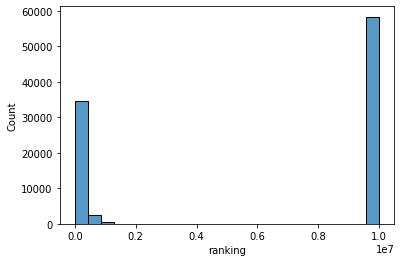

In [7]:
import seaborn as sns
print("Total no.of Rankings are: ",len(d['ranking'].unique()))
sns.histplot(d['ranking'])

Distribution of having and not having IP address
No.of links having IP address and not having are 22 , 95888 respectively


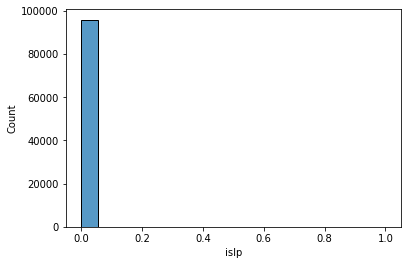

In [8]:
print("Distribution of having and not having IP address")
sns.histplot(d['isIp'])
print("No.of links having IP address and not having are {} , {} respectively".format(len(d[d['isIp']==1]),len(d[d['isIp']==0])))

Distribution of valid and invalid registration
No.of links having valid registration and not having are 55042 , 40868 respectively


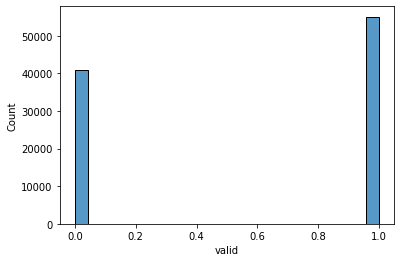

In [9]:
print("Distribution of valid and invalid registration")
sns.histplot(d['valid'])
print("No.of links having valid registration and not having are {} , {} respectively".format(len(d[d['valid']==1]),len(d[d['valid']==0])))

Duration of activeness since registration


<AxesSubplot:xlabel='activeDuration', ylabel='Count'>

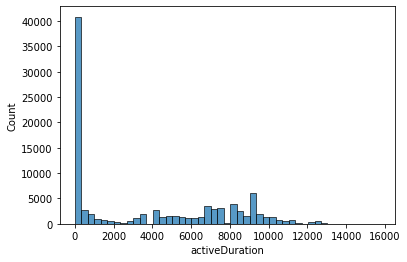

In [10]:
print("Duration of activeness since registration")
sns.histplot(d['activeDuration'])

Length of URL


<AxesSubplot:xlabel='urlLen', ylabel='Count'>

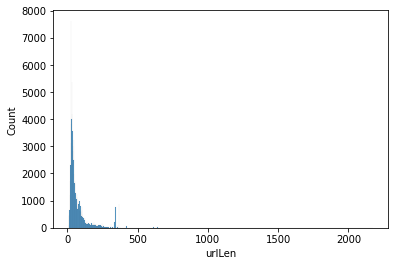

In [11]:
print("Length of URL")
sns.histplot(d['urlLen'])

Links which have @ character


<AxesSubplot:xlabel='is@', ylabel='Count'>

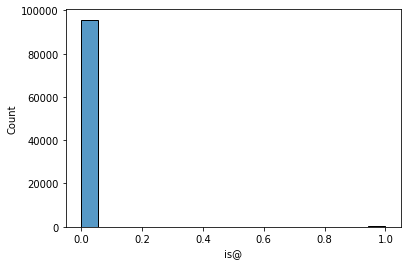

In [12]:
print("Links which have @ character")
sns.histplot(d['is@'])

URL having redirecting


<AxesSubplot:xlabel='isredirect', ylabel='Count'>

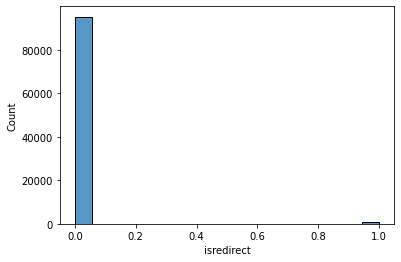

In [13]:
print("URL having redirecting")
sns.histplot(d['isredirect'])

Having dashes in domain name


<AxesSubplot:xlabel='haveDash', ylabel='Count'>

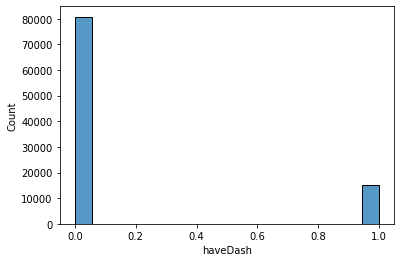

In [14]:
print("Having dashes in domain name")
sns.histplot(d['haveDash'])

The length of just the domain name.


<AxesSubplot:xlabel='domainLen', ylabel='Count'>

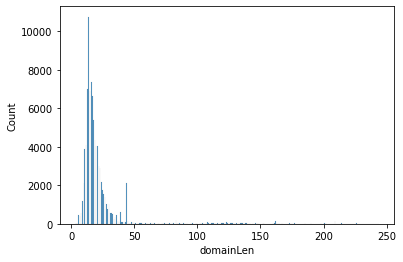

In [15]:
print("The length of just the domain name.")
sns.histplot(d['domainLen'])

The number of subdomains preset in the URL


<AxesSubplot:xlabel='nosOfSubdomain', ylabel='Count'>

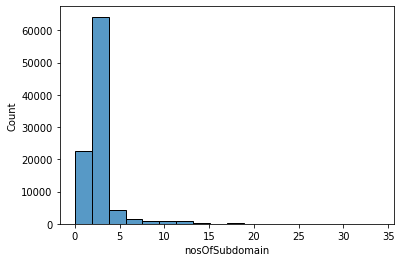

In [16]:
print("The number of subdomains preset in the URL")
sns.histplot(d['nosOfSubdomain'])

Distribution of Legitimate(0) and Phishing websites(1) for given data


<AxesSubplot:xlabel='label', ylabel='Count'>

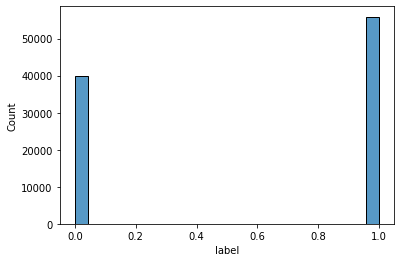

In [17]:
print("Distribution of Legitimate(0) and Phishing websites(1) for given data")
sns.histplot(d['label'])

In [18]:
#removing unimportant characters in 'domain'
import re
import string
chars = re.escape(string.punctuation)
newdomain=[]
for i in d['domain']:
    newdomain.append(re.sub(r'['+chars+']', ' ',i))
d['domain']=newdomain
d

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www voting yahoo com,10000000,0,0,0,20,0,0,1,20,2,1
1,www zvon org xxl WSDL1 1 Output index html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais com file security update infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima astro umd edu nemo linuxastro,7001,0,0,0,35,0,0,0,18,3,0
4,huarui tec com js us battle net login en ref...,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95905,www freewebs com ryanrules2,5001,0,1,8035,28,0,0,0,16,2,0
95906,www ireland information com freecelticfonts htm,230251,0,1,8400,47,0,0,1,27,2,0
95907,www clubtaunus soroptimist de img pro e php,10000000,0,0,0,43,0,0,0,29,3,1
95908,www askmen com sports business index html,2008,0,1,9862,41,0,0,0,14,2,0


In [19]:
## links we have
len(d['domain'].unique())

71675

In [20]:
#visualization of most frequent vs least words
from wordcloud import WordCloud, STOPWORDS
comment_words = '' 
stopwords = set(STOPWORDS) 
print(stopwords)
for val in d['domain']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

{'hers', 'ever', 'each', 'there', 'against', "they'd", 'had', 'once', 'as', "that's", 'doing', 'be', 'its', 'then', 'an', 'their', 'what', 'can', 'do', 'here', 'she', "weren't", "we'll", 'the', 'just', 'therefore', 'http', "won't", "mustn't", 'again', 'since', "why's", "it's", 'by', 'but', 'more', "she's", 'k', 'any', 'otherwise', 'her', 'they', 'below', "you've", "isn't", "who's", "can't", 'have', 'between', "i'm", 'whom', 'most', 'them', "doesn't", 'our', "you'll", 'and', 'too', 'could', "wasn't", 'off', 'also', 'same', 'through', "couldn't", "she'll", "we've", 'down', 'some', 'very', "aren't", 'until', 'not', 'would', "what's", "he'd", 'ours', 'having', 'nor', 'than', "how's", "we'd", "when's", 'a', 'was', 'are', 'or', 'hence', "wouldn't", 'those', 'all', 'about', 'get', "we're", 'how', 'with', 'com', "hasn't", 'no', "they've", 'were', 'while', "you'd", 'under', 'itself', 'yours', 'only', 'been', "they're", 'who', 'he', 'such', 'above', "let's", 'other', "he's", 'over', "she'd", 'th

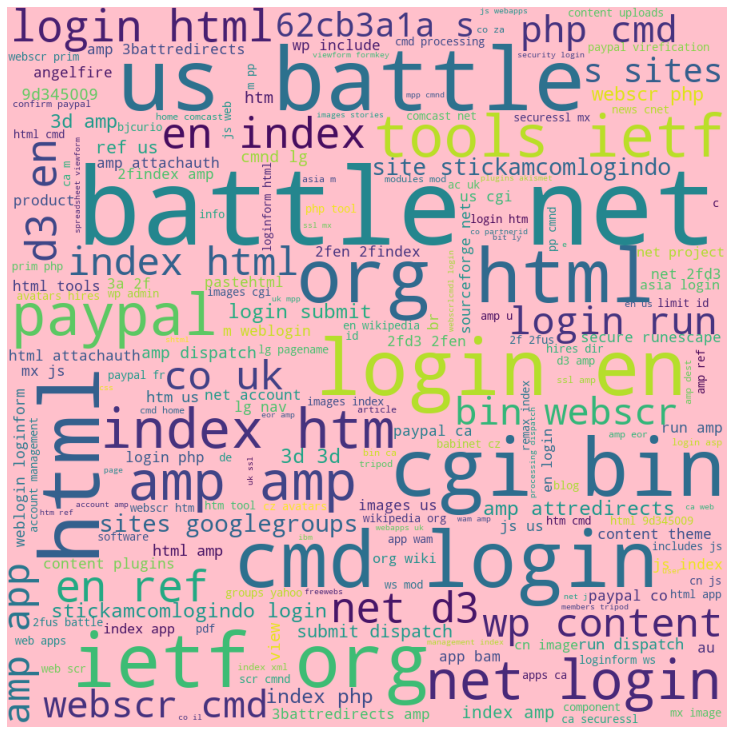

In [21]:
wordcloud = WordCloud(width = 900, height = 900, 
                background_color ='pink', 
                stopwords=stopwords,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

In [22]:
#correlation betwween attributes
corre=d.corr()
corre

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
ranking,1.000000,0.002302,-0.271810,-0.462385,0.104733,0.022798,0.059468,0.103518,0.154659,0.105718,0.516873
isIp,0.002302,1.000000,0.004698,0.000379,-0.001197,-0.000799,-0.001312,-0.002781,0.006634,0.027164,0.012811
valid,-0.271810,0.004698,1.000000,0.812531,-0.050022,-0.023917,-0.026677,-0.128651,-0.126793,-0.174061,-0.266774
activeDuration,-0.462385,0.000379,0.812531,1.000000,-0.133796,-0.026034,-0.047993,-0.150173,-0.178393,-0.178431,-0.523114
urlLen,0.104733,-0.001197,-0.050022,-0.133796,1.000000,0.017182,-0.010021,0.370280,0.497716,0.346738,0.396519
is@,0.022798,-0.000799,-0.023917,-0.026034,0.017182,1.000000,-0.004567,0.000549,-0.002268,-0.003439,0.039777
isredirect,0.059468,-0.001312,-0.026677,-0.047993,-0.010021,-0.004567,1.000000,-0.007222,-0.015948,-0.026618,0.073247
haveDash,0.103518,-0.002781,-0.128651,-0.150173,0.370280,0.000549,-0.007222,1.000000,0.365871,0.250143,0.239623
domainLen,0.154659,0.006634,-0.126793,-0.178393,0.497716,-0.002268,-0.015948,0.365871,1.000000,0.863078,0.231828
nosOfSubdomain,0.105718,0.027164,-0.174061,-0.178431,0.346738,-0.003439,-0.026618,0.250143,0.863078,1.000000,0.113249


<Figure size 2160x2160 with 0 Axes>

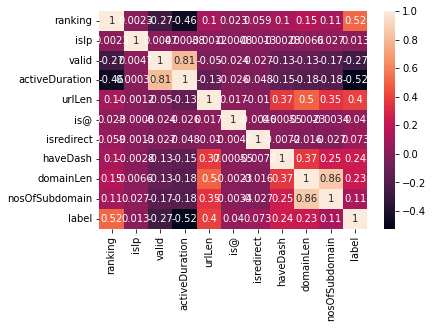

<Figure size 2160x2160 with 0 Axes>

In [23]:
sns.heatmap(corre,annot=True)
plt.figure(figsize=(30,30))
#from this heatmap we can determine most related attributes

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d['domain']=le.fit_transform(d['domain'])
d

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,67990,10000000,0,0,0,20,0,0,1,20,2,1
1,70076,194914,0,1,7305,42,0,0,0,12,2,0
2,32395,10000000,0,0,0,155,0,0,0,14,1,1
3,4831,7001,0,0,0,35,0,0,0,18,3,0
4,15260,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95905,50992,5001,0,1,8035,28,0,0,0,16,2,0
95906,54194,230251,0,1,8400,47,0,0,1,27,2,0
95907,45648,10000000,0,0,0,43,0,0,0,29,3,1
95908,42479,2008,0,1,9862,41,0,0,0,14,2,0


Splitting Data

In [25]:
from sklearn.model_selection import train_test_split
X=d.drop('label',axis=1)
Y=d['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.6)


RANDOM FOREST CLASSIFIER

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import time
rf=RandomForestClassifier(n_jobs=-1)
t1=time.time()
rf.fit(x_train,y_train)
print("Time taken to train Random Forest Classifier:",time.time()-t1,"seconds")

Time taken to train Random Forest Classifier: 1.704336404800415 seconds


In [27]:
testpred=rf.predict(x_test)
trainpred=rf.predict(x_train)
cr=classification_report(testpred, y_test)
print(cr)
rfacc=np.array([100*accuracy_score(testpred,y_test),100*accuracy_score(trainpred,y_train)])
print("Testing accuracy Random Forest:",100*accuracy_score(testpred,y_test))
print("Training accuracy Random Forest:",100*accuracy_score(trainpred,y_train))
print(rfacc)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     23979
           1       0.97      0.96      0.97     33567

    accuracy                           0.96     57546
   macro avg       0.96      0.96      0.96     57546
weighted avg       0.96      0.96      0.96     57546

Testing accuracy Random Forest: 96.02752580544261
Training accuracy Random Forest: 99.99739338963612
[96.02752581 99.99739339]


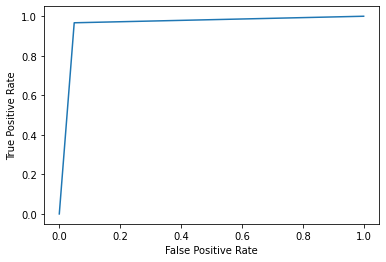

In [28]:
auc_train, auc_train1, _ = roc_curve(y_train,trainpred)
auc_test, auc_test1, _ = roc_curve(y_test, testpred)
bow_test_auc = auc(auc_test, auc_test1)
bow_train_auc = auc(auc_train, auc_train1)
plt.plot(auc_test,auc_test1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
print("Train AUC", bow_train_auc)
print("Test AUC", bow_test_auc)
print("From the obtained AUC value the performance of Random Forest model is high and will be the same for new test Data")

Train AUC 0.9999686422075885
Test AUC 0.9589647301767666
From the obtained AUC value the performance of Random Forest model is high and will be the same for new test Data


LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
t1=time.time()
logr.fit(x_train,y_train)
print("Time taken to train LogisticRegressor:",time.time()-t1,"seconds")

Time taken to train LogisticRegressor: 0.4020826816558838 seconds


In [31]:
trainpred1=logr.predict(x_train)
testpred1=logr.predict(x_test)
print("The accuracy Logistic Regression on training data is: ",100.0 *accuracy_score(y_train,trainpred1))
print("The accuracy Logistic Regression on testing data is: ",100.0 *accuracy_score(y_test,testpred1))

The accuracy Logistic Regression on training data is:  78.78219163799395
The accuracy Logistic Regression on testing data is:  78.95944114273799


SVM

In [32]:
'''
from sklearn.svm import SVC
svc = SVC()
t1=time.time()
svc.fit(x_train,y_train)
print("Time taken to train SVM:",time.time()-t1,"seconds")
trainpred2=svc.predict(x_train)
testpred2 = svc.predict(x_test)
print("The accuracy SVM on training data is: ",100.0 *accuracy_score(y_train,trainpred2))
print("The accuracy SVM on testing data is: ",100.0 *accuracy_score(y_test,testpred2))
'''

'\nfrom sklearn.svm import SVC\nsvc = SVC()\nt1=time.time()\nsvc.fit(x_train,y_train)\nprint("Time taken to train SVM:",time.time()-t1,"seconds")\ntrainpred2=svc.predict(x_train)\ntestpred2 = svc.predict(x_test)\nprint("The accuracy SVM on training data is: ",100.0 *accuracy_score(y_train,trainpred2))\nprint("The accuracy SVM on testing data is: ",100.0 *accuracy_score(y_test,testpred2))\n'

In [33]:
print("Algorithm                Train                  Test")
print("-----------------------------------------------------------------------")
print("RandomForestClassifier  ",100*accuracy_score(trainpred,y_train),"   ",100*accuracy_score(testpred,y_test))
print("LogisticRegression      ",100.0 *accuracy_score(y_train,trainpred1),"    ",100.0 *accuracy_score(y_test,testpred1))
#print("SVM                     ",100.0 *accuracy_score(y_train,trainpred2),"    ",100.0 *accuracy_score(y_test,testpred2))

Algorithm                Train                  Test
-----------------------------------------------------------------------
RandomForestClassifier   99.99739338963612     96.02752580544261
LogisticRegression       78.78219163799395      78.95944114273799


Take input

In [34]:
import pickle
filename = 'model.pkl'
accfile = "accuracy.pkl"
encoder = 'encode.pkl'
pickle.dump(rf, open(filename, 'wb'))
pickle.dump(le, open(encoder, 'wb'))
acc = rfacc[0]
acc = round(acc, 2)
accu = pickle.dump(acc, open(accfile, 'wb'))
print(acc)

96.03


In [9]:
x=0
for i in 'pngmart':
    x+=ord(i)
x

761